In [26]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin, sqrt
from multiprocessing import Pool, cpu_count


In [59]:
N = 1000                  # 1MHz is periodic to 1000 samples if Fsamp = 1GHz
w1, w2, w3 = 80, 81, 82   # Effectively MHz

n = np.linspace(0, 1, 1000)

n1 = np.multiply(n, w1)
n2 = np.multiply(n, w2)
n3 = np.multiply(n, w3)

wav3 = np.sin(n3)

def rat(p):
    p1, p2 = p
    wav1 = np.sin(np.add(n1, p1))
    wav2 = np.sin(np.add(n2, p2))
    
    dat = wav1 + wav2 + wav3
    peak = dat.max()
    rms = sqrt(dat.dot(dat) / N)
    return rms / peak

def rat_plot(p):
    p1, p2 = p
    wav1 = np.sin(np.add(n1, p1))
    wav2 = np.sin(np.add(n2, p2))
    
    return wav1 + wav2 + wav3

In [60]:
phases = np.linspace(-2*pi, 2*pi, 100)
workers = Pool(processes=cpu_count())

results = []

for p1 in phases: 
    args = [(p1, p2) for p2 in phases]
    results.append(workers.map(rat, args))

No handles with labels found to put in legend.


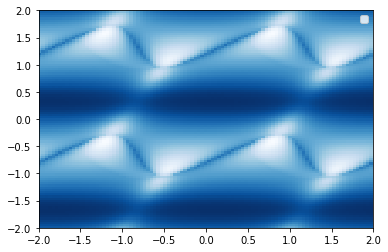

In [61]:
npi = np.linspace(-2, 2, 100)

plt.pcolor(npi, npi, results, cmap='Blues')
plt.legend()
plt.show()